In [8]:
#import the package
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#define the file path
bass_file= 'DataSet/nsynth-valid/audio/bass_electronic_018-022-075.wav'

#Store class names in array
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']
#Store source names in array
source_names=['acoustic', 'electronic', 'synthetic']


#load the waveform y and sampling rate s
y, sr = librosa.load(bass_file, sr=None)
print(y)
print(sr)

hop_length = 512

[0.00018311 0.00259399 0.00552368 ... 0.         0.         0.        ]
16000


In [10]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

print(y_harmonic)
print(y_percussive)
# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])


[ 2.3747625e-05  6.6153960e-05  3.7835893e-05 ...  2.2597790e-09
 -6.7049810e-09 -3.3893821e-09]
[ 1.5934394e-04  2.5278260e-03  5.4858308e-03 ... -2.2597011e-09
  6.7049304e-09  3.3895613e-09]


c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\librosa\filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


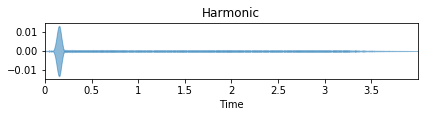

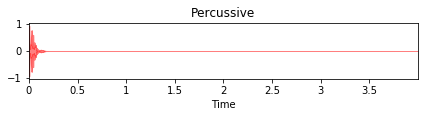

In [11]:
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.5)
plt.title('Harmonic')
plt.tight_layout()
plt.show()

plt.figure(1)
plt.subplot(3, 1, 1)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive')
plt.tight_layout()
plt.show()